# Discretization and Transformation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib notebook

In [8]:
datapath = '../Data/'

data1 = np.loadtxt(datapath+'winequality-white.csv', delimiter=';', skiprows=1)
data1[:,-1] = 0
data2 = np.loadtxt(datapath+'winequality-red.csv', delimiter=';', skiprows=1)
data2[:,-1] = 1
data = np.concatenate([data1,data2])

#data = np.loadtxt(datapath+'seeds.csv', delimiter=';', skiprows=1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mx = MinMaxScaler()

data = mx.fit_transform(data)

<IPython.core.display.Javascript object>


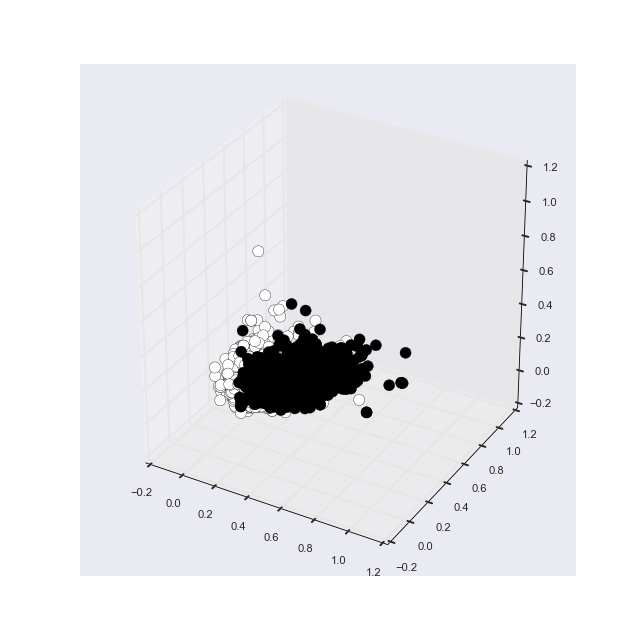

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(data[:, 0], data[:, 1], zs=data[:, 2], depthshade=False, c=data[:,-1],s=100)


<IPython.core.display.Javascript object>


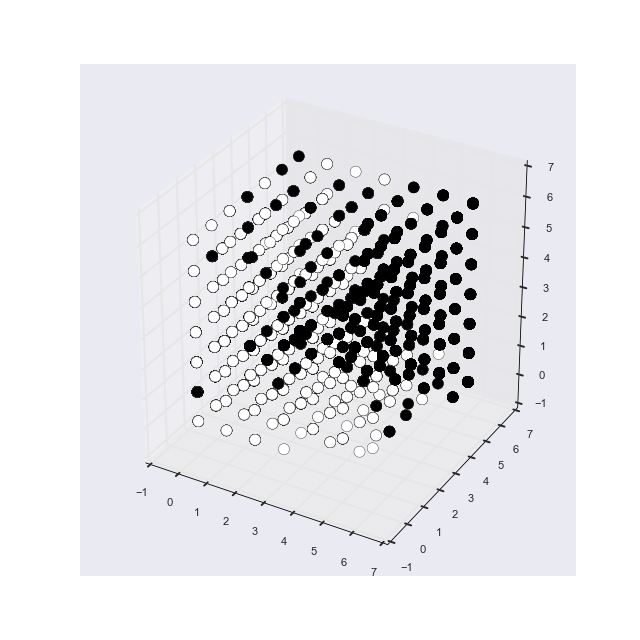

In [10]:
from amltlearn.preprocessing import Discretizer

disc = Discretizer(bins=7, method='frequency')

disc.fit(data[:,:-1])
datadisc = disc.transform(data[:,:-1], copy=True)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(datadisc[:, 0], datadisc[:, 1], zs=datadisc[:, 2], depthshade=False, c=data[:,-1],s=100)

<IPython.core.display.Javascript object>


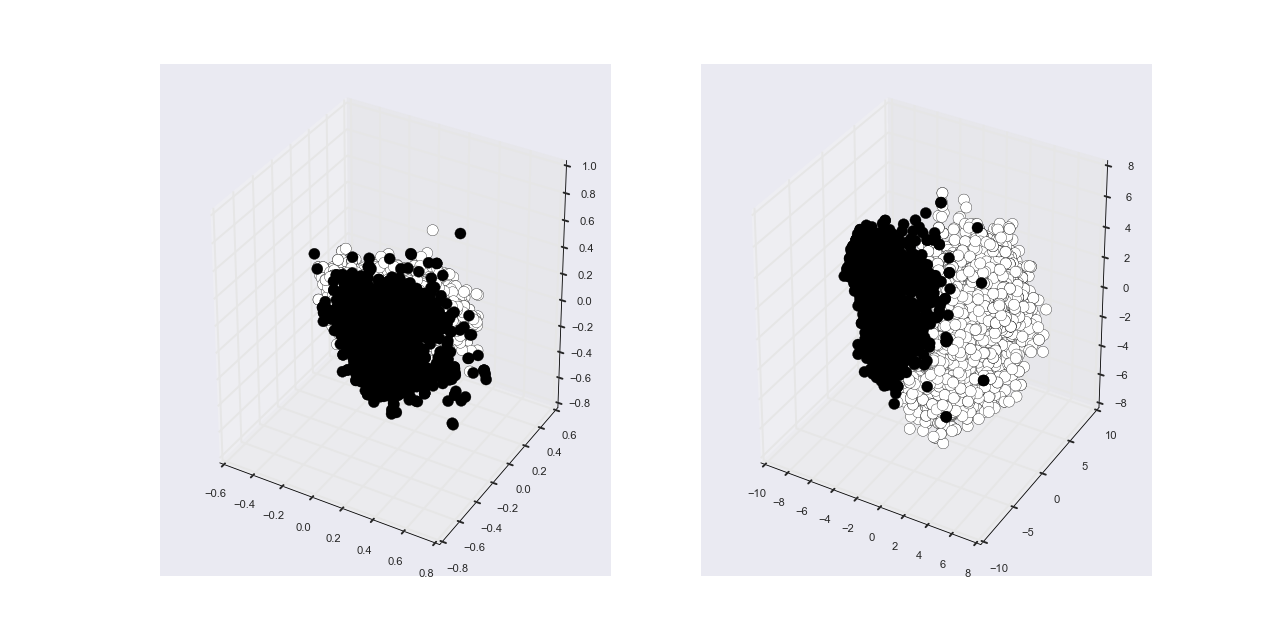

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
fdata = pca.fit_transform(data[:,:-1])
fdata2 = pca.fit_transform(datadisc)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=data[:,-1],s=100)
ax = fig.add_subplot(122, projection='3d')
plt.scatter(fdata2[:, 0], fdata2[:, 1], zs=fdata2[:, 2], depthshade=False, c=data[:,-1],s=100)


<IPython.core.display.Javascript object>


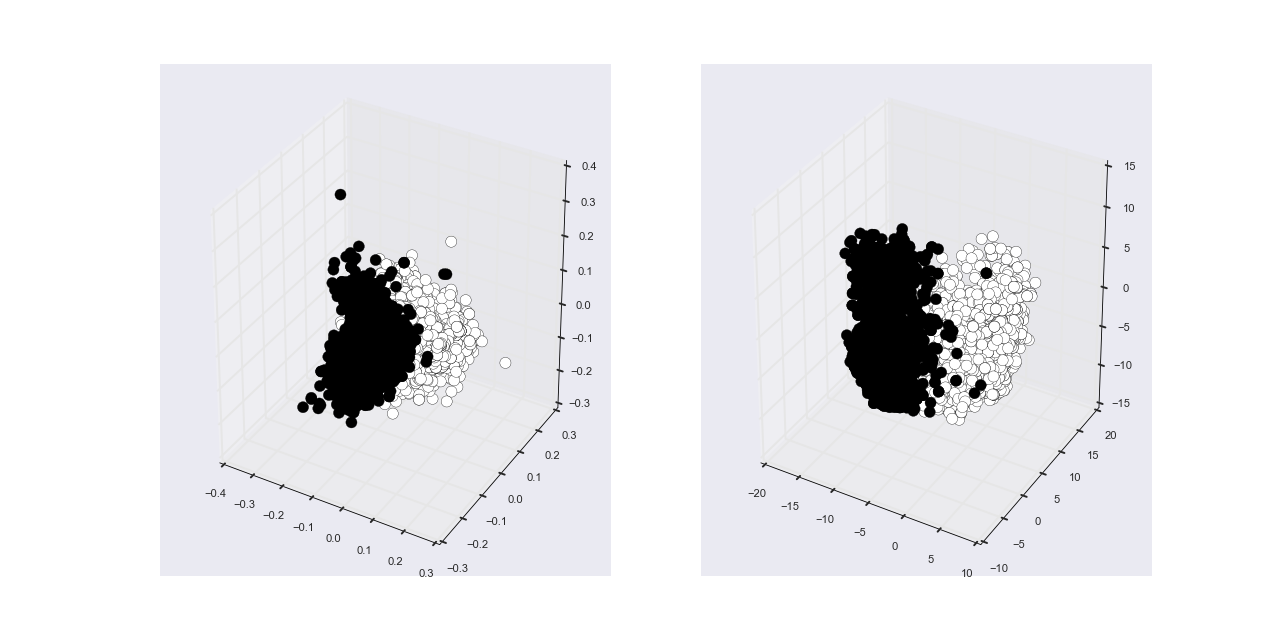

In [12]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='poly', degree=2)

fdata = kpca.fit_transform(data[:,:-1])
fdata2 = kpca.fit_transform(datadisc)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=data[:,-1],s=100)
ax = fig.add_subplot(122, projection='3d')
plt.scatter(fdata2[:, 0], fdata2[:, 1], zs=fdata2[:, 2], depthshade=False, c=data[:,-1],s=100)

<IPython.core.display.Javascript object>


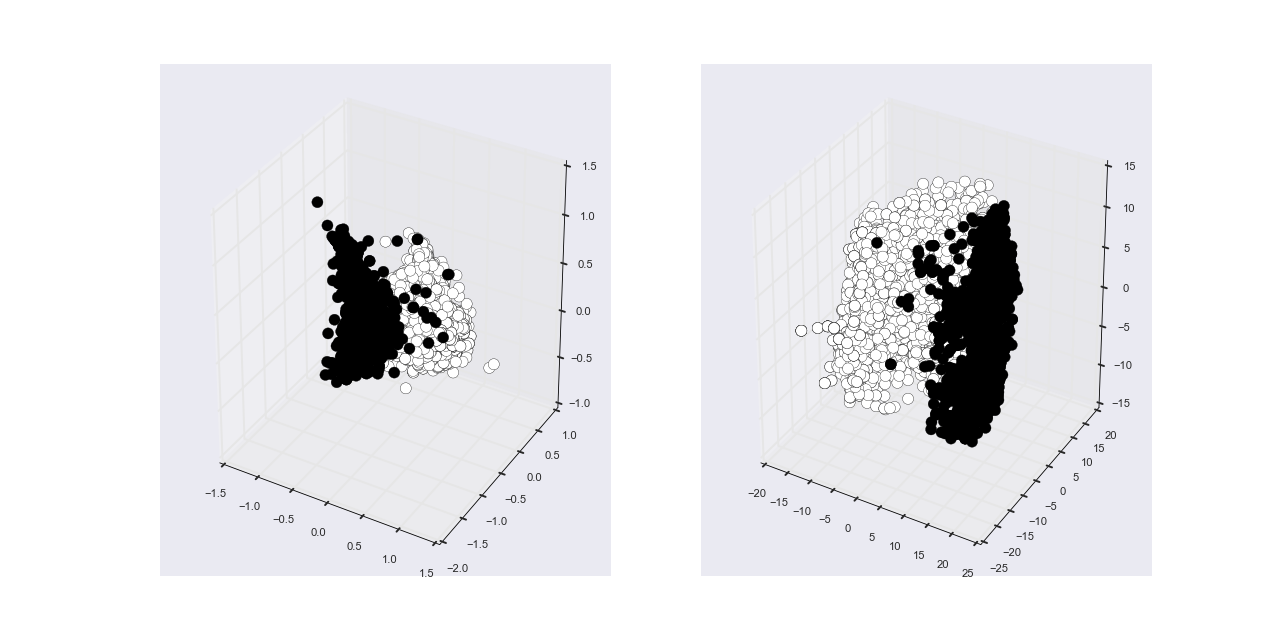

In [13]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_neighbors=7)
fdata = iso.fit_transform(data[:,:-1])
fdata2 = iso.fit_transform(datadisc)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=data[:,-1],s=100)
ax = fig.add_subplot(122, projection='3d')
plt.scatter(fdata2[:, 0], fdata2[:, 1], zs=fdata2[:, 2], depthshade=False, c=data[:,-1],s=100)